In [1]:
import math as m
import sympy as sym
import scipy.optimize as sp
import numpy as np
import matplotlib.pyplot as plt

<h4> 9.3 Symbolic Mathematics</h4>
$$F(\lambda) = \lambda^{2}$$

In [2]:
L = sym.symbols('L')
F = L**2

sym.textplot(F,1,6)

     36 |                                                       /
        |                                                     .. 
        |                                                   ..   
        |                                                 ..     
        |                                               ..       
        |                                            ...         
        |                                          ..            
        |                                        ..              
19.5294 | ------------------------------------...----------------
        |                                  ...                   
        |                                ..                      
        |                             ...                        
        |                         ....                           
        |                      ...                               
        |                 .....                                  
        | 

>sym.plotting.plot(F,(L,1,6))
```
/home/brendan_m/.local/lib/python3.7/site-packages/sympy/plotting/plot.py:1065: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['left'].set_smart_bounds(True)
/home/brendan_m/.local/lib/python3.7/site-packages/sympy/plotting/plot.py:1066: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['bottom'].set_smart_bounds(False)
  ```

2D Rosenbrock function:
$$f(x) = 100(x_{0}^{2} - x_{1})^{2} + (x_{0} - 1)^{2}$$

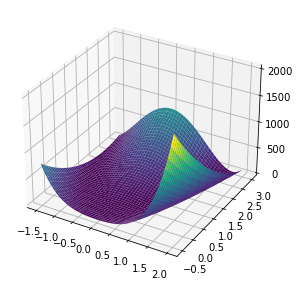

In [3]:
x0, x1 = sym.symbols('x0, x1')
f = 100 * (x0**2 - x1)**2 + (x0-1)**2

sym.plotting.plot3d(f,(x0,-1.5,2),(x1,-0.5,3))

<h5>9.3.1 Differentiation</h5>

In [4]:
print('First partial derivative: ',sym.diff(f,x0))
print('Second partial derivative: ',sym.diff(f,x1))
print('\n')
print('Hessian matrix d/dx0(df/dx0): ', sym.diff(f,x0,x0))

First partial derivative:  400*x0*(x0**2 - x1) + 2*x0 - 2
Second partial derivative:  -200*x0**2 + 200*x1


Hessian matrix d/dx0(df/dx0):  2*(600*x0**2 - 200*x1 + 1)


In [5]:
print('Hessian matrix d/dx1(df/dx1): ', sym.diff(f,x1,x1))
print('Hessian matrix d/dx1(df/dx0): ', sym.diff(f,x0,x1))
print('Hessian matrix d/dx0(df/dx1): ', sym.diff(f,x1,x0))

Hessian matrix d/dx1(df/dx1):  200
Hessian matrix d/dx1(df/dx0):  -400*x0
Hessian matrix d/dx0(df/dx1):  -400*x0


In [6]:
x0, x1 = sym.symbols('x0, x1')
f = 100 * (x0**2 - x1)**2 + (x0-1)**2
x = [x0, x1]

gradf = sym.derive_by_array(f,x)
hessian = sym.derive_by_array(gradf,x)

print('The gradient vector is:')
sym.pretty_print(gradf)
print('\n')
print('The Hessian matrix is:')
sym.pretty_print(hessian)

The gradient vector is:
⎡       ⎛  2     ⎞                     2         ⎤
⎣400⋅x₀⋅⎝x₀  - x₁⎠ + 2⋅x₀ - 2  - 200⋅x₀  + 200⋅x₁⎦


The Hessian matrix is:
⎡       2                      ⎤
⎢1200⋅x₀  - 400⋅x₁ + 2  -400⋅x₀⎥
⎢                              ⎥
⎣       -400⋅x₀           200  ⎦


<h5>9.3.2 Numerical Evaluation</h5>

In [7]:
print('Rosenbrock function evaluated at x0=5,x1=1 gives: ',f.subs({x0:5,x1:1}))
print('\n')
print('Rosenbrock function evaluated at x0=0,x1=0 gives: ',f.subs({x0:0,x1:0}))
print('\n')
print('Gradient of the Rosenbrock function evaluated at x0=5,x1=1 gives: ',gradf.subs({x0:5,x1:1}))

Rosenbrock function evaluated at x0=5,x1=1 gives:  57616


Rosenbrock function evaluated at x0=0,x1=0 gives:  1


Gradient of the Rosenbrock function evaluated at x0=5,x1=1 gives:  [48008, -4800]


In [8]:
mydict = {'value1':2.73, 'value2':3.14}
print('The value associated with value2 is: ', mydict['value2'])

The value associated with value2 is:  3.14


In [9]:
x0, x1 = sym.symbols('x0, x1')
f = 100 * (x0**2 - x1)**2 + (x0-1)**2
x = [x0, x1]

gradf = sym.derive_by_array(f,x)
hessian = sym.derive_by_array(gradf,x)

f_numeric = sym.lambdify((x0,x1),f)
gradf_numeric = sym.lambdify((x0,x1),gradf)
hessian_numeric = sym.lambdify((x0,x1), hessian)

print('Rosenbrock function evaluated at x0=5,x1=1 gives: ', f_numeric(5,1))
print('Gradient of the Rosenbrock function evaluated at x0=5,x1=1 gives: ',gradf_numeric(5,1))
print('Hessian of the Rosenbrock function evaluated at x0=5,x1=1 gives: ',hessian_numeric(5,1))

Rosenbrock function evaluated at x0=5,x1=1 gives:  57616
Gradient of the Rosenbrock function evaluated at x0=5,x1=1 gives:  [48008, -4800]
Hessian of the Rosenbrock function evaluated at x0=5,x1=1 gives:  [[29602, -2000], [-2000, 200]]


<h5>9.3.3 Optimality Criteria</h5>

In [10]:
x0, x1 = sym.symbols('x0, x1')
f = 100 * (x0**2 - x1)**2 + (x0 - 1)**2

dfdx0 = sym.diff(f,x0)
dfdx1 = sym.diff(f,x1)

solution = sym.solve([dfdx0, dfdx1], [x0, x1])

print('The gradient vector is zero at the point: ', solution)

The gradient vector is zero at the point:  [(1, 1)]


<h4> 9.4 Numerical Linear Algebra </h4>

$$\boldsymbol{b} = [12.5,37.5,120]^{T}$$
<br>
$$\boldsymbol{A} = \begin{bmatrix} 2 & 1 & 0 \\ 1 & 2 & 1 \\ 0 & 1 & 2 \end{bmatrix}$$
$\boldsymbol{x}$

In [11]:
b = np.array([12.5, 37.5, 120])
A = np.array([[2,1,0],[1,2,1],[0,1,2]])

x = np.linalg.solve(A,b)

print('The solution is: ', x)

The solution is:  [ 20.625 -28.75   74.375]


$\boldsymbol{A}\mathbf{x} = \boldsymbol{b}$

In [12]:
print('A*x -',np.dot(A,x),'is indeed equal to b')
np.dot(A,x) - b

A*x - [ 12.5  37.5 120. ] is indeed equal to b


array([0., 0., 0.])

In [13]:
print('Rank of A is: ', np.linalg.matrix_rank(A))
print('\n')
print('Determinant of A is: ', np.linalg.det(A))
print('\n')
[EigenValues, EigenVectors] = np.linalg.eig(A)
print('Eigenvalues of A are: ', EigenValues)
print('Product of Eigenvalues is: ', np.prod(EigenValues))
print('Eigenvectors of A are: \n', EigenVectors)

Rank of A is:  3


Determinant of A is:  4.0


Eigenvalues of A are:  [3.41421356 2.         0.58578644]
Product of Eigenvalues is:  3.9999999999999947
Eigenvectors of A are: 
 [[-5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [-7.07106781e-01  5.09486455e-16 -7.07106781e-01]
 [-5.00000000e-01 -7.07106781e-01  5.00000000e-01]]


<h5>9.4.1 Overdetermined System of Equations </h5>
$\mathbf{C}\mathbf{x} = \mathbf{d}$
$$\mathbf{d} = [12.5, 37.5, 120, 55]^{T}$$
<br>
$$\mathbf{C} = \begin{bmatrix} 2 & 1 & 0 \\ 1 & 2 & 1 \\ 0 & 1 & 2 \\ 0 & 1 & 1\end{bmatrix}$$
<br>
$$\mathbf{e} = \mathbf{C}\mathbf{x} - \mathbf{d}$$ Find solution by minimising error, $\mathbf{e}$
<br>
$$\mathbf{e}^{T}\mathbf{e} = (\mathbf{x}^{T}\mathbf{C}{T} - \mathbf{d}^{T})(\mathbf{C}\mathbf{x} - \mathbf{d})$$
$$\mathbf{e}^{T}\mathbf{e}^{T} = \mathbf{x}^{T}\mathbf{C}^{T}\mathbf{C}\mathbf{x} - 2\mathbf{x}^{T}\mathbf{C}^{T}\boldsymbol{d} + \mathbf{d}^{T}\mathbf{d} \space\space\space(9.5)$$
The <b>first order necessary condition</b> for a minimum is obtained by differentiating (9.5) w.r.t. $\mathbf{x}$, which gives the minimum error solution by solving the following linear system:
$$\mathbf{C}^{T}\mathbf{C}\mathbf{x} = \mathbf{C}^{T}\mathbf{d}$$

In [14]:
d = np.array([12.5, 37.5, 120, 55])
C = np.array([[2,1,0], [1,2,1], [0,1,2], [0,1,1]])

CTC = np.dot(C.transpose(),C)
CTd = np.dot(C.transpose(),d)

x = np.linalg.solve(CTC, CTd)

print('The solution that minimises the error is: ', x)

The solution that minimises the error is:  [ 18.06818182 -25.34090909  73.52272727]


$\boldsymbol{e} = \boldsymbol{C}\mathbf{x} - \boldsymbol{d}$

In [15]:
e = np.dot(C,x) - d
eTe = np.dot(e,e)

print('Cx is -',np.dot(C,x),'which should be',d,'the error squared is',eTe)

Cx is - [ 10.79545455  40.90909091 121.70454545  48.18181818] which should be [ 12.5  37.5 120.   55. ] the error squared is 63.92045454545455


The solution is indeed confirmed to be a minimum sing $\mathbf{C}^{T}\mathbf{C}$ is positive definite. This confirms the <b>second order necessary condition</b>

In [16]:
[EigenValues, EigenVectors] = np.linalg.eig(CTC)

print('Second order sufficiency: Positive-definite with eigenvalues', EigenValues)
print('Product of Eigenvalues is: ', np.prod(EigenValues))
print('Eigenvectors of CTC are: \n', EigenVectors)

Second order sufficiency: Positive-definite with eigenvalues [13.20312646  4.41987857  0.37699497]
Product of Eigenvalues is:  21.999999999999975
Eigenvectors of CTC are: 
 [[-0.41798254 -0.7676085   0.48586808]
 [-0.71807265 -0.04844484 -0.69428003]
 [-0.55647306  0.63908551  0.53094957]]


<h5>9.4.2 Underdetermined System of Equations</h5>
$\mathbf{Z}\mathbf{x} = \mathbf{y}$
$$\boldsymbol{y} = [12.5, 37.5]^{T}$$
<br>
$$\mathbf{Z} = \begin{bmatrix} 2 & 1 & 0 \\ 1 & 2 & 1 \end{bmatrix}$$ 
Since we have 3 unknowns to satisfy only 2 equations we have an $\infty$ number of solutions. We can formulate an optimisation problem, the solution of which gives preference of one solution over others. Enforcing preference for a particular solution is referreed to as homogenisation. Here we choose to prefer solution vectors with shorter length over those with longer lengths:
$$\underset{w.r.t.\space \mathbf{x}}{minimise}\space \frac{1}{2}\mathbf{x}^{T}\mathbf{x}$$
<br>
subject to the constraints:
$$\mathbf{Z}\mathbf{x} = \mathbf{y}$$
<br>
The Lagrangian for the equality constrained problem is given by:
$$\frac{1}{2}\mathbf{x}^{T} + \lambda^{T}(\mathbf{Z}\mathbf{x} - \mathbf{y})$$
<br>
from which the necessary KKT condition follow:
$$\frac{dL}{d\mathbf{x}} = \mathbf{x} + \mathbf{Z}^{T} \lambda = \mathbf{0} \space\space\space(9.9)$$
$$\frac{dL}{d\lambda} = \mathbf{Z}\mathbf{x} - \mathbf{y} = \mathbf{0}$$
<br>
Consider (9.9) pre-multiplied by $\mathbf{Z}$ to obtain
$$\mathbf{Z}\mathbf{x} + \mathbf{ZZ}^{T}\lambda = \mathbf{0}$$
<br>
Since $\mathbf{Z}\mathbf{x} = \mathbf{y}$, it follows that we can solve for $\lambda$ independent of $\mathbf{x}$:
$$\lambda = -(\mathbf{ZZ}^{T})^{-1}\mathbf{y} \space\space\space(9.12)$$
<br>
From (9.9) and (9.12) we finally obtain the minimum norm solution:
$$\mathbf{x} = \mathbf{Z}^{T}(\mathbf{ZZ}^{T})^{-1}\mathbf{y}$$

In [17]:
y = np.array([12.5, 37])
Z = np.array([[2, 1, 0], [1, 2, 1]])

ZZT = np.dot(Z,Z.transpose())
RHS = np.linalg.solve(ZZT,y)

x = np.dot(Z.transpose(),RHS)

print('The solution with the minimum length is: ', x)
print('Zx is', np.dot(Z,x),'which corresponds to',y)

The solution with the minimum length is:  [-0.78571429 14.07142857  9.64285714]
Zx is [12.5 37. ] which corresponds to [12.5 37. ]


<h4>9.5 Numerical Functions</h4>
2 Ways to define numerical functions:

```Python
function_handle = lambda x: f(x)
```
or

```Python
def function_handle(x):
    function = f(x)
    return function
```

In [18]:
rosenbrock = lambda x: 100*(x[0]**2 - x[1])**2 + (x[0]-1)**2
x = np.array([0,0])
rosen00 = rosenbrock(x)

def rosenbrock(x):
    functionvalue = 100*(x[0]**2 - x[1])**2 + (x[0]-1)**2
    return functionvalue
x = np.array([1,1])
rosen11 = rosenbrock(x)

print('Rosenbrock function evaluated at x0=0,x1=0 gives: ', rosen00)
print('Rosenbrock function evaluated at x0=1,x1=1 gives: ', rosen11)

Rosenbrock function evaluated at x0=0,x1=0 gives:  1
Rosenbrock function evaluated at x0=1,x1=1 gives:  0


<h4>9.6 Optimisation Algorithm</h4>

The ```scipy.optimize.minimize``` function inputs and available method algorithms:
```Python
scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None bounds=None, 
                        constraints=(), tol=None, callback=None, options=None)
```

<table style="width:20%">
<tr> <th>Algorithm</th><th>Identifier</th> </tr>
<tr> <td>Nelder-Mead</td> <td><tt>'nelder-mead'</tt></td> </tr>
<tr> <td>Powell</td> <td><tt>'powell'</tt></td> </tr>
<tr> <td>Conj. Grad</td> <td><tt>'cg'</tt></td> </tr>
<tr> <td>BFGS</td> <td><tt>'bfgs'</tt></td> </tr>
<tr> <td>Dogleg Trust</td> <td><tt>'dogleg'</tt></td> </tr>
<tr> <td>Newtong CG Trust</td> <td><tt>'ncg-trust'</tt></td> </tr>
<tr> <td>Truncated Newton</td> <td><tt>'tnc'</tt></td> </tr>
<tr> <td>Lim. Mem. BFGS</td> <td><tt>'l-bfgs-b'</tt></td> </tr>
<tr> <td>COBYLA</td> <td><tt>'cobyla'</tt></td> </tr>
<tr> <td>SLSQP</td> <td><tt>'slsqp'</tt></td> </tr>
</table>

<h5>9.6.1 Unconstrained Minimisation</h5>
Consider 
$$f(x) = 100(x_{0}^{2} - x_{1})^{2} + (x_{0} - 1)^{2}$$
with
$$\mathbf{x}^{0}=[5, 3]$$
Using BFGS method algorithm to minimise the Rosenbrock function without constraints

In [19]:
x0 = np.array([5, 3])
result = sp.minimize(rosenbrock, x0, method='bfgs')
print(result)

      fun: 1.882266296712165e-11
 hess_inv: array([[0.49823107, 0.99641   ],
       [0.99641   , 1.99771441]])
      jac: array([ 4.28327718e-05, -2.11272386e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 351
      nit: 59
     njev: 113
   status: 2
  success: False
        x: array([0.99999581, 0.99999151])


The accuracy can be increased and the nfev decreased by supplying the Jacobian function.
<br>
The gradient vector was previously calculated as:
$$[400x_{0}(x_{0}^{2} - x_{1}) + 2x_{0} - 2 \space\space\space -200x_{0}^{2} + 200x_{1}]$$

In [20]:
def gradient_rosenbrock(x):
    dfdx0 = 400*x[0]*(x[0]**2 - x[1]) + 2*x[0] - 2
    dfdx1 = -200*x[0]**2 + 200*x[1]
    return np.array([dfdx0, dfdx1])

x0 = np.array([5, 3])
result = sp.minimize(rosenbrock, x0, method='bfgs', jac=gradient_rosenbrock)
print(result)

      fun: 9.858390793340965e-19
 hess_inv: array([[0.49984651, 0.99969821],
       [0.99969821, 2.0044068 ]])
      jac: array([ 1.09567782e-08, -4.51146320e-09])
  message: 'Optimization terminated successfully.'
     nfev: 76
      nit: 56
     njev: 76
   status: 0
  success: True
        x: array([1., 1.])


The ```scipy.optimize.check_grad``` allows for easy verification of analytical gradients by verifying it against built-in finite difference schemes at a specified point:

In [21]:
point = np.array([3, 2])

print('Gradient check: Difference is ', sp.check_grad(rosenbrock, gradient_rosenbrock, point))

Gradient check: Difference is  6.103515625e-05


Instead of using built-in ```Python``` schemes to compute the gradient, an accurate numerical finite difference scheme such as the $complex-step \space method$, PMO §2.3.1.6 [1], can be used to explicitly compute the gradient vector:

In [22]:
rosenbrock = lambda x: 100*(x[0]**2 - x[1])**2 + (x[0] - 1)**2

def finitedifference_rosenbrock(x):
    dfdx = []
    delta = 1e-20
    
    for i in range(len(x)):
        step = np.zeros(len(x), dtype=complex)
        step[i] = complex(0, delta)
        dfdx.append(np.imag(rosenbrock(x+step))/delta)
        
    return np.array([dfdx[0], dfdx[1]])

x0 = np.array([5, 3])
result = sp.minimize(rosenbrock, x0, method='bfgs', jac=finitedifference_rosenbrock)

print(result)

      fun: 1.4496363359720043e-18
 hess_inv: array([[0.4998082 , 0.99962102],
       [0.99962102, 2.00425127]])
      jac: array([ 9.94697170e-09, -3.78443943e-09])
  message: 'Optimization terminated successfully.'
     nfev: 76
      nit: 56
     njev: 76
   status: 0
  success: True
        x: array([1., 1.])


In [23]:
point = np.array([3, 2])

print('Gradient check: Difference is ', sp.check_grad(rosenbrock, finitedifference_rosenbrock, point))

Gradient check: Difference is  6.103515625e-05


<h5>9.6.2 Constrained Minimisation</h5>
Consider 
$$minimise \space \space f(\mathbf{x}) = 2x_{2} - x_{1}$$
subject to
$$g_{1}(\mathbf{x}) = x_{1}^{2} + 4x_{2}^{2} - 16 \leq 0,$$
$$g_{2}(\mathbf{x}) = (x_{1} - 3)^{2} + (x_{2} - 3)^{2} - 9 \leq 0$$
and 
$$x_{1} \geq 0 \space \& \space x_{2} \geq 0$$
<br>
Using SLSQP method algorithm to minimise the function with constraints

In [24]:
# Objective function
f = lambda x: 2*x[1] - x[0]

# Constraints should be in the form g >= 0
# Constraints are assembled into a list of dictionaries
cons = [{'type': 'ineq', 'fun': lambda x: -x[0]**2 - 4*x[1]**2 + 16},
        {'type': 'ineq', 'fun': lambda x: -(x[0] - 3)**2 - (x[1] - 3)**2 + 9}]

# Bounds are given as lists per dimension
# Lower bound is 0, & upper bound is unspecified
bounds = [[0, None], [0, None]]

# Define initial values and minimise without supplying analytical gradients
x0 = np.array([1, 1])
result = sp.minimize(f, x0, constraints=cons, bounds=bounds, method='slsqp')
print(result)

     fun: -3.6527011374767544
     jac: array([-1.,  2.])
 message: 'Optimization terminated successfully'
    nfev: 18
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([3.98608288, 0.16669087])


In [25]:
# Supplying analytical gradients to reduce computational requirement
def gradf(x):
    return np.array([-1, 2])
def gradg0(x):
    return np.array([-2*x[0], -8*x[1]])
def gradg1(x):
    return np.array([-2*(x[0]-3), -2*(x[1]-3)])

# Constructing constraints with new information
cons = ({'type': 'ineq', 'fun': lambda x: -x[0]**2 - 4*x[1]**2 + 16, 'jac': gradg0},
        {'type': 'ineq', 'fun': lambda x: -(x[0] - 3)**2 -(x[1] - 3)**2 +9, 'jac': gradg1})

# Define initial values and minimise with supplying analytical gradients
x0 = np.array([1, 1])
result = sp.minimize(f, x0, jac=gradf, constraints=cons, bounds=bounds, method='slsqp')
print(result)

     fun: -3.652701137483122
     jac: array([-1.,  2.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([3.98608288, 0.16669087])


<h4>9.7 Practical Mathematical Optimisation (PMO) Algorithms</h4>

The optimisation algorithms presented in this section can be found via <tt>Springer</tt> under the module name <tt>pmo</tt>.

The available method algorithms are supplied to ```scipy.optimize.minimize``` <tt>method</tt> as function objects.

<table style="width:20%">
<tr> <th>Algorithm</th><th>Identifier</th> </tr>
<tr> <td>LFOPC</td> <td><tt>'lfopc'</tt></td> </tr>
<tr> <td>ETOPC</td> <td><tt>'etopc'</tt></td> </tr>
<tr> <td>SQSD</td> <td><tt>'sqsd'</tt></td> </tr>
<tr> <td>Dynamic-Q</td> <td><tt>'dynq'</tt></td> </tr>
<tr> <td>Snyman-Fatti</td> <td><tt>'sfglob'</tt></td> </tr>
<tr> <td>GO-SSA</td> <td><tt>'gossa'</tt></td> </tr>
<tr> <td>GO-SDA</td> <td><tt>'gosda'</tt></td> </tr>
<tr> <td>GO-BFGS</td> <td><tt>'gobfgs'</tt></td> </tr>
</table>
<br>
Additional information on the argument settings is avaliable using <tt>help(pmo.dynq)</tt>
<br>
Consider the problem from §9.6.2. 
Consider 
$$minimise \space \space f(\mathbf{x}) = 2x_{2} - x_{1}$$
subject to
$$g_{1}(\mathbf{x}) = x_{1}^{2} + 4x_{2}^{2} - 16 \leq 0,$$
$$g_{2}(\mathbf{x}) = (x_{1} - 3)^{2} + (x_{2} - 3)^{2} - 9 \leq 0$$
and 
$$x_{1} \geq 0 \space \& \space x_{2} \geq 0$$
<br>
Using Dynamic-Q method algorithm to minimise the function with constraints

In [26]:
import pmo #as pmo

f = lambda x: 2*x[1] - x[0]

def gradf(x):
    return np.array([-1, 2])

def gradg0(x):
    return np.array([-2*x[0], -8*x[1]])

def gradg1(x):
    return np.array([-2*(x[0]-3), -2*(x[1]-3)])

bounds = [[0, None], [0, None]]

cons = ({'type': 'ineq', 'fun': lambda x: -x[0]**2 - 4*x[1]**2 + 16, 'jac': gradg0},
        {'type': 'ineq', 'fun': lambda x: -(x[0]-3)**2 - (x[1]-3)**2 + 9, 'jac':gradg1})

x0 = np.array([1, 1])

result = sp.minimize(f, x0, jac=gradf, constraints=cons, bounds=bounds, method=pmo.dynq)
print(result)

     fun: -3.6527010947260283
     jac: array([-1,  2])
    nfev: 8
     nit: 6
    njev: 7
 success: True
       x: array([3.98608287, 0.16669089])


<h4> Extras</h4>

The ```scipy.optimize.bracket``` brackets the minimum of a given function with destinct initial points, by searching in the downhill direction from the initial points and return new points xa, xb, xc that bracket the minimum of the function f(xa) > f(xb) < f(xc).


**It doesn’t always mean that obtained solution will satisfy xa<=x<=xb.*

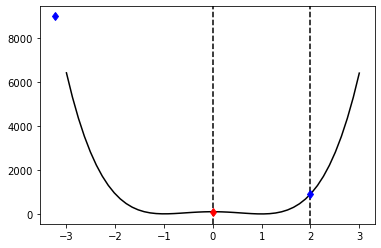

In [77]:
def g(x):

    return (x - 1)**2 + 100*(x**2 - 1)**2

x = np.linspace(-3, 3)
y = g(x)
init_xa, init_xb = 0, 2

xa, xb, xc, fa, fb, fc, funcalls = sp.bracket(g, xa=init_xa, xb=init_xb)
plt.axvline(x=init_xa, color='k', linestyle='--')
plt.axvline(x=init_xb, color='k', linestyle='--')
plt.plot(x, y, '-k')
plt.plot(xa, fa, 'bd')
plt.plot(xb, fb, 'rd')
plt.plot(xc, fc, 'bd')
plt.show()

#### Reference:
__<a href="https://www.springer.com/gp/book/9783319775852">Snyman,J.A, Wilke, D.N, Practical Mathematical Optimization, Springer 2018_________[1]</a>__